### 따릉이 데이터 EDA

In [2]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 주어진 데이터 셋을 훈련 세트와 테스트 세트로 나누는 데 사용
from sklearn.model_selection import train_test_split
#그래프 고해상도 출력
%config InlineBackend.figure_format = 'retina' 

In [3]:
#현재 폴더 위치 확인
%pwd 

'c:\\Users\\chica\\BAF-15-Fresh-Edu\\2주차'

In [18]:
train_df = pd.read_csv('C:/Users/chica/OneDrive/바탕 화면/BAF/train.csv', encoding='cp949')
#인코딩 오류로 cp949 사용

### 데이터 소개

**train 데이터 (`test.csv`)**
- Date: 날짜
- Rented Bike Count: 대여된 자전거 수
- Hour: 시간
- Temperature: 기온
- Humidity(%): 습도
- Wind speed (m/s): 풍속
- Visibility (10m): 가시거리 (10미터 단위, 정수)
- Dew point temperature: 이슬점 온도
- Solar Radiation (MJ/m2): 태양 복사
- Rainfall(mm): 강우량 (밀리미터, 실수)
- Snowfall (cm): 적설량 (센티미터, 실수)
- Seasons: 계절 (문자열)
- Holiday: 공휴일 여부 (문자열)
- Functioning Day: 자전거 대여가 가능한 날인지 여부 (문자열)

In [19]:
train_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,08/02/2018,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,28/03/2018,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,30/04/2018,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,29/05/2018,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes


In [20]:
#앞에 행 5개 추출
train_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes


In [21]:
#뒤에 5개 행 추출
train_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
7003,08/02/2018,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,28/03/2018,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,30/04/2018,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,29/05/2018,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes
7007,20/09/2018,1290,17,19.3,76,2.1,2000,14.9,0.21,0.0,0.0,NaN,No Holiday,Yes


In [49]:
#결측치, 변수 타입, 데이터 차원 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7008 non-null   object 
 1   Rented Bike Count          7008 non-null   int64  
 2   Hour                       7008 non-null   int64  
 3   Temperature(°C)            6306 non-null   float64
 4   Humidity(%)                7008 non-null   int64  
 5   Wind speed (m/s)           6303 non-null   float64
 6   Visibility (10m)           7008 non-null   int64  
 7   Dew point temperature(°C)  7008 non-null   float64
 8   Solar Radiation (MJ/m2)    7008 non-null   float64
 9   Rainfall(mm)               7008 non-null   float64
 10  Snowfall (cm)              7008 non-null   float64
 11  Seasons                    7008 non-null   object 
 12  Holiday                    7008 non-null   object 
 13  Functioning Day            7008 non-null   objec

In [22]:
#기술통계량 확인
train_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,7008.000000,7008.000000,6306.000000,7008.000000,6303.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,708.597603,11.559646,13.030082,58.141981,1.732937,1440.761558,4.042066,0.574576,0.150271,0.075300
std,647.980391,6.923619,11.986773,20.423404,1.030763,607.545441,13.121249,0.874529,1.134598,0.440936
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,6.000000,3.600000,42.000000,1.000000,946.000000,-4.800000,0.000000,0.000000,0.000000
50%,505.500000,12.000000,14.000000,57.000000,1.500000,1703.000000,5.100000,0.010000,0.000000,0.000000
75%,1071.000000,18.000000,22.675000,74.000000,2.350000,2000.000000,14.900000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [23]:
#결측치 개수 오름차순 정렬
train_df.isna().sum(axis=0).sort_values()

Date                           0
Rented Bike Count              0
Hour                           0
Humidity(%)                    0
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Holiday                        0
Functioning Day                0
Seasons                      699
Temperature(°C)              702
Wind speed (m/s)             705
dtype: int64

계절, 온도, 풍속에서 결측치가 존재하기에 값을 채워야함
- 계절: 월별로 분류하여 삽입
- 온도, 풍속: 월별 평균 온도, 월별 평균 풍속으로 대체

In [30]:
# 계절이 결측인 값들 확인해보기
train_df[train_df['Seasons'].isna()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
22,31/08/2018,987,14,29.3,41,1.9,1928,14.6,3.00,0.0,0.0,NaN,No Holiday,Yes
30,09/11/2018,0,23,10.9,76,1.2,456,6.8,0.00,0.0,0.0,NaN,No Holiday,No
47,15/09/2018,1566,18,NaN,76,1.2,2000,19.6,0.12,0.0,0.0,NaN,No Holiday,Yes
55,24/01/2018,121,22,-15.2,45,4.0,2000,-24.4,0.00,0.0,0.7,NaN,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,15/03/2018,567,21,10.4,96,2.7,499,9.7,0.00,0.0,0.0,NaN,No Holiday,Yes
6968,22/07/2018,772,1,NaN,60,0.8,2000,18.8,0.00,0.0,0.0,NaN,No Holiday,Yes
6983,28/11/2018,1540,8,NaN,29,1.1,1337,-14.1,0.02,0.0,0.0,NaN,No Holiday,Yes
6988,13/06/2018,2088,14,26.6,50,2.4,1119,15.3,2.95,0.0,0.0,NaN,No Holiday,Yes


In [31]:
# 온도가 결측인 값들 확인해보기
train_df[train_df['Temperature(°C)'].isna()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
6,04/07/2018,941,11,NaN,60,2.3,1861,21.3,2.61,0.0,0.0,Summer,No Holiday,Yes
11,24/05/2018,1390,7,NaN,61,1.3,1818,5.1,0.42,0.0,0.0,Spring,No Holiday,Yes
18,10/04/2018,133,21,NaN,70,7.3,1634,11.9,0.00,0.5,0.0,Spring,No Holiday,Yes
19,10/11/2018,754,0,NaN,77,0.9,433,7.4,0.00,0.0,0.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978,27/02/2018,72,5,NaN,50,0.1,1026,-8.6,0.00,0.0,0.0,Winter,No Holiday,Yes
6979,23/02/2018,42,0,NaN,86,2.7,54,-0.3,0.00,0.4,0.4,Winter,No Holiday,Yes
6983,28/11/2018,1540,8,NaN,29,1.1,1337,-14.1,0.02,0.0,0.0,NaN,No Holiday,Yes
6999,15/11/2018,1416,17,NaN,38,1.4,884,-0.3,0.29,0.0,0.0,Autumn,No Holiday,Yes


In [32]:
# 풍속이 결측인 값들 확인해보기
train_df[train_df['Wind speed (m/s)'].isna()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
10,21/03/2018,374,10,3.6,37,NaN,2000,-9.7,0.83,0.0,0.0,Spring,No Holiday,Yes
23,14/03/2018,309,1,13.7,73,NaN,1182,8.9,0.00,0.0,0.0,Spring,No Holiday,Yes
33,26/06/2018,26,14,21.0,97,NaN,381,20.4,0.26,2.5,0.0,Summer,No Holiday,Yes
51,09/01/2018,320,9,-6.0,61,NaN,1547,-12.3,0.13,0.0,0.6,Winter,No Holiday,Yes
52,16/07/2018,688,11,31.5,51,NaN,1498,20.1,2.83,0.0,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6948,11/10/2018,1398,21,NaN,52,NaN,2000,0.0,0.00,0.0,0.0,Autumn,No Holiday,Yes
6953,08/03/2018,17,5,3.1,90,NaN,974,1.6,0.00,0.0,0.0,Spring,No Holiday,Yes
6975,22/09/2018,1062,11,22.7,55,NaN,1297,13.1,1.86,0.0,0.0,Autumn,No Holiday,Yes
6993,06/05/2018,211,13,16.4,94,NaN,1947,15.4,0.78,0.0,0.0,Spring,No Holiday,Yes


In [44]:
#계절 결측치: Date의 월로 분류
train_df['month'] = pd.to_datetime(train_df['Date'], format='%d/%m/%Y')
train_df['month'] = train_df['month'].dt.month
train_df.groupby('month')['Seasons'].value_counts(dropna=False)

month  Seasons
1      Winter     543
       NaN         73
2      Winter     496
       NaN         44
3      Spring     523
       NaN         47
4      Spring     507
       NaN         63
5      Spring     524
       NaN         63
6      Summer     522
       NaN         62
7      Summer     553
       NaN         55
8      Summer     523
       NaN         56
9      Autumn     520
       NaN         59
10     Autumn     540
       NaN         59
11     Autumn     527
       NaN         55
12     Winter     531
       NaN         63
Name: count, dtype: int64

In [47]:
# 월별 계절 매핑 딕셔너리 생성
season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}

# 'month' 열을 기준으로 계절을 매핑하여 결측치 채우기
train_df['Seasons'] = train_df.apply(lambda row: season_mapping.get(row['month'], np.nan) if pd.isna(row['Seasons']) else row['Seasons'], axis=1)

# 결측이 남아있는지 확인
train_df[train_df['Seasons'].isna()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month


In [54]:
# 월별 평균 온도 계산
avg_temp_monthly = train_df.groupby('month')['Temperature(°C)'].transform('mean')

# 결측치 대체 (lambda 함수 사용)
train_df['Temperature(°C)'] = train_df['Temperature(°C)'].fillna(avg_temp_monthly)

# 결측이 남아있는지 확인
train_df[train_df['Temperature(°C)'].isna()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month


In [55]:
# 월별 평균 풍속 계산
avg_wind_monthly = train_df.groupby('month')['Wind speed (m/s)'].transform('mean')

# 결측치 대체 (lambda 함수 사용)
train_df['Wind speed (m/s)'] = train_df['Wind speed (m/s)'].fillna(avg_wind_monthly)

# 결측이 남아있는지 확인
train_df[train_df['Wind speed (m/s)'].isna()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month


In [57]:
#전체 열 결측치 유무 확인
train_df.isna().sum(axis=0).sort_values()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
dtype: int64

In [58]:
# 중복행 확인
train_df[train_df.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month


Text(0.5, 1.0, 'correlation heatmap')

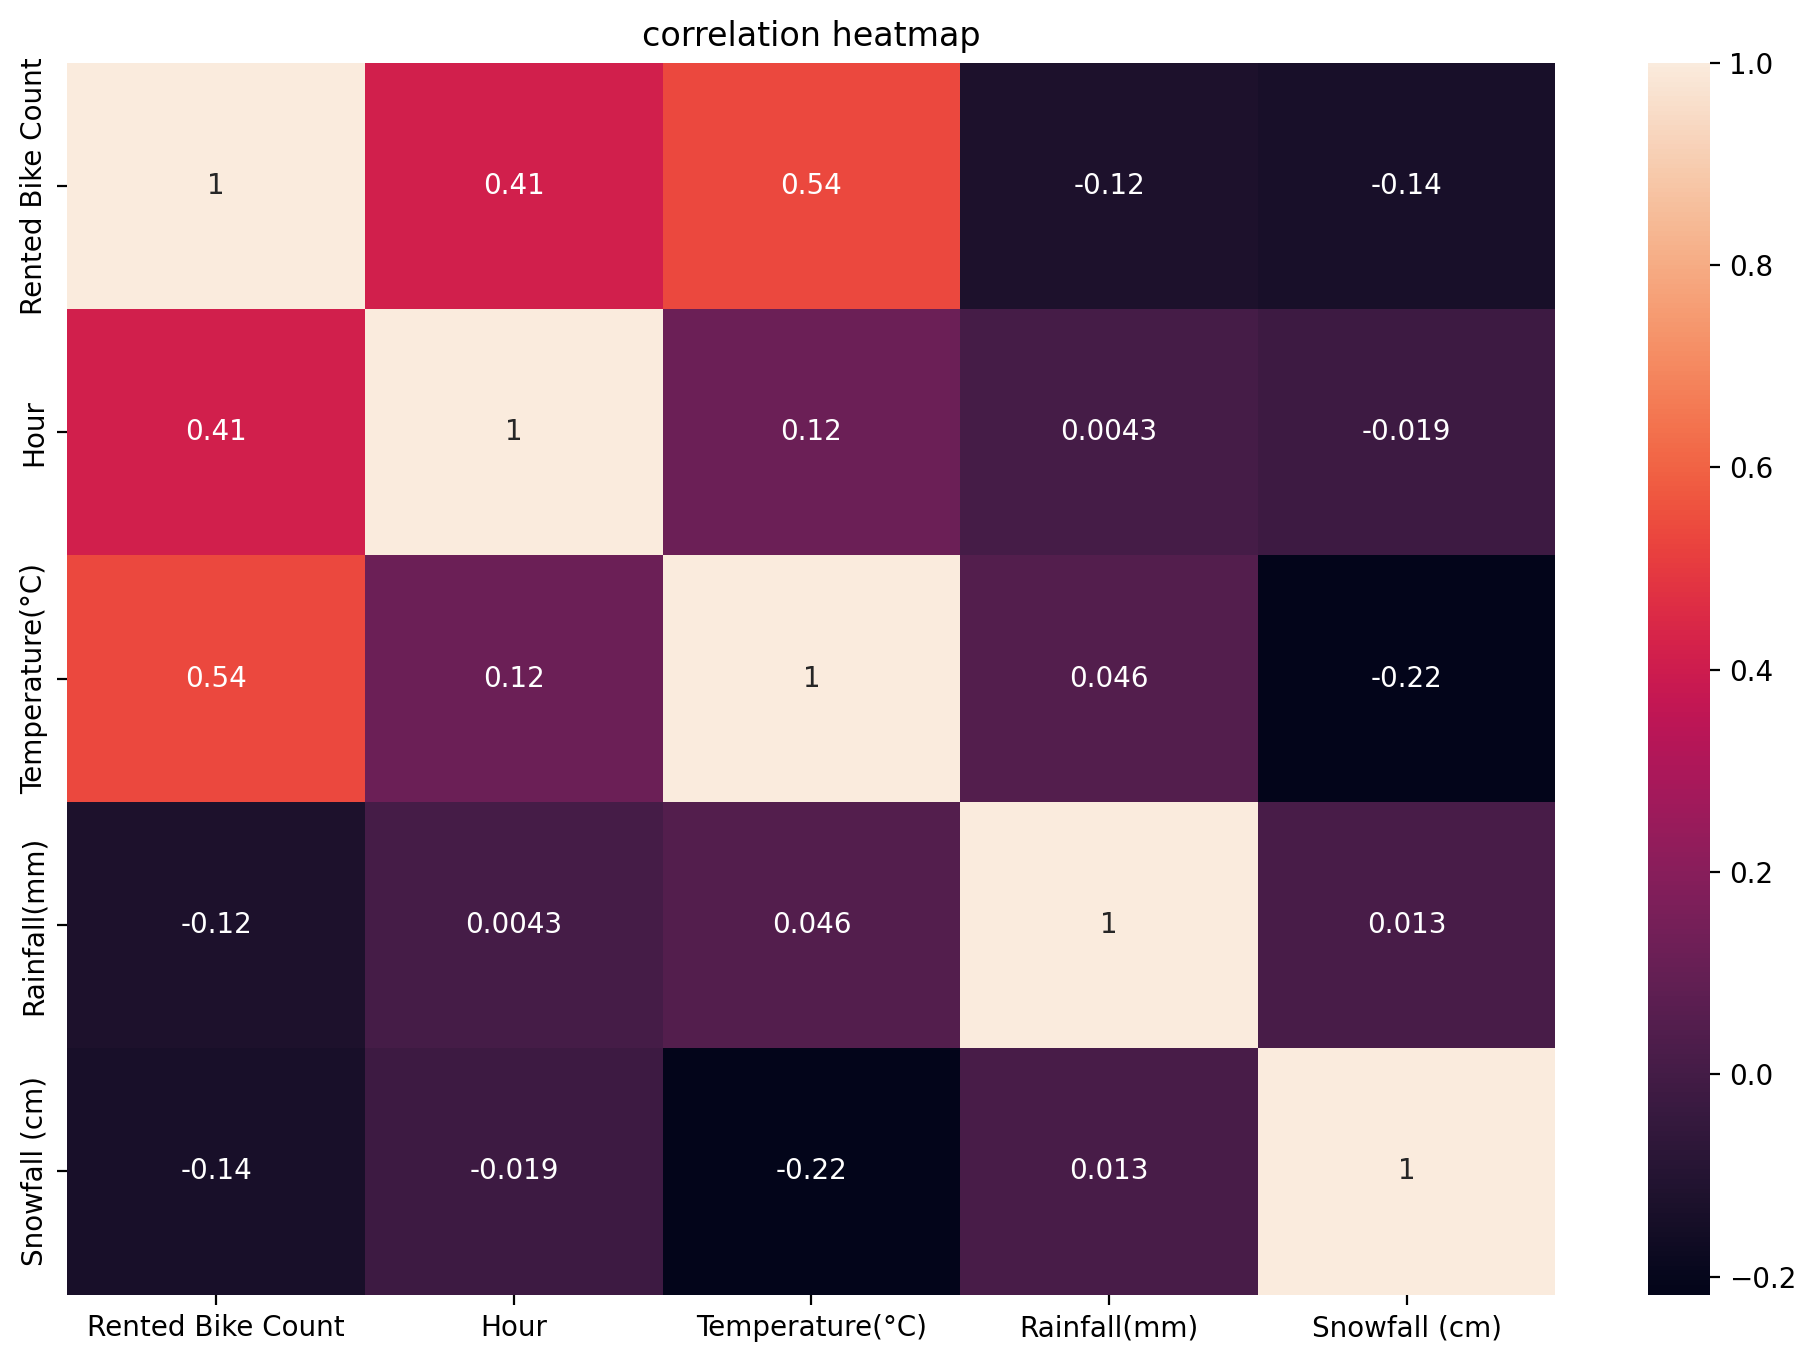

In [61]:
# 상관계수 행렬 히트맵 출력
plt.figure(figsize=(12,8))
sns.heatmap(train_df[['Rented Bike Count','Hour','Temperature(°C)','Rainfall(mm)','Snowfall (cm)']].corr(),annot=True)
plt.title('correlation heatmap')

In [63]:
# 데이터의 여러행 추출
train_df[['Rented Bike Count','Hour','Temperature(°C)','Rainfall(mm)','Snowfall (cm)']]

,Rented Bike Count,Hour,Temperature(°C),Rainfall(mm),Snowfall (cm)
0,1492,16,13.071053,0.0,0.0
1,1536,14,23.000000,0.0,0.0
2,327,2,6.200000,0.0,0.0
3,170,4,23.200000,0.0,0.0
4,45,5,23.700000,0.1,0.0
...,...,...,...,...,...
7003,255,7,-9.600000,0.0,0.0
7004,104,4,10.600000,0.0,0.0
7005,569,0,14.700000,0.0,0.0
7006,2234,8,20.500000,0.0,0.0


### 종속변수 Recented Bike Count 확인하기
<가설>
- 온도와 대여량: 20도~25도에서 대여량이 가장 많을것이며 이것을 기준으로 symmetric한 그래프를 가지고 있을 것이다.

- 계절과 대여량: 온도와의 상관관계에서 예측한 바와 같이 봄, 가을이 비슷한 수준으로 대여량이 많고 여름과 겨울에 적을 것이다.

- 휴일과 대여량: 평일과 비교하였을 때, 큰 수준의 차이를 보일 것이다. 또한 사용시간이 길어질수록, 휴일 대여량은 늘어나고, 평일 대여량은 줄어들 것이다.

In [67]:
train_df['Rented Bike Count'].value_counts()

Rented Bike Count
0       236
103      17
122      16
178      16
165      15
       ... 
2377      1
1424      1
2194      1
3146      1
2234      1
Name: count, Length: 2038, dtype: int64

In [68]:
train_df['Rented Bike Count'].value_counts().values

array([236,  17,  16, ...,   1,   1,   1], dtype=int64)

>### 시간과 대여량의 상관관계

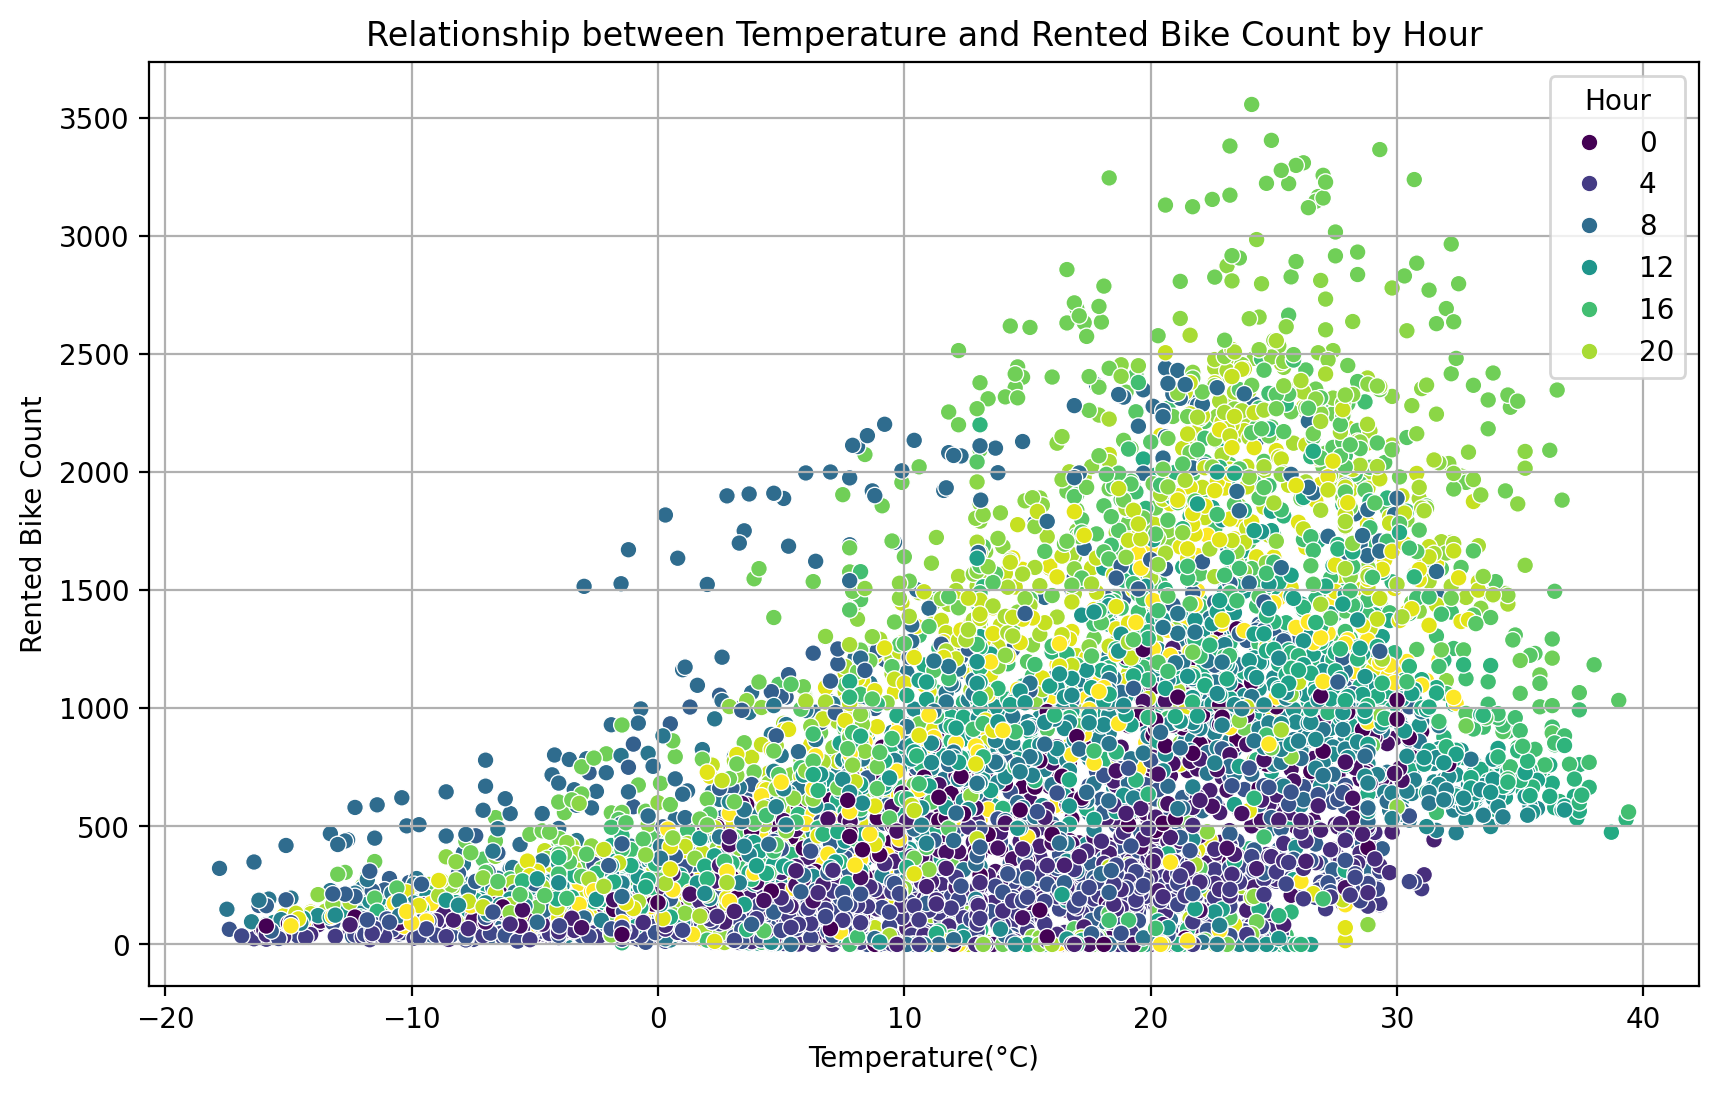

In [76]:
# 시간별 평균 대여량 계산
hourly_avg_rentals = train_df.groupby('Hour')['Rented Bike Count'].mean()

# 온도와 대여량의 관계 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=train_df, hue='Hour', palette='viridis')
plt.title('Relationship between Temperature and Rented Bike Count by Hour')
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.legend(title='Hour')
plt.grid(True)
plt.show()

<분석 결과>
- 온도와 대여량이 30도 수준까지는 비례적으로 증가하는 관계를 가지고 있음을 알 수 있다
- 30도를 넘어서는 순간 대여량은 급격하게 감소한다.
- 사용시간은 20도~30도에서 길어진다.

<결론>
- 가설에서 예측한 바와 비슷하게, 20도~30도에서 가장 많은 대여량을 보여주고 있다.
- 가설에서 예측한 바와 다르게, symetric한 분포모양을 가지고 있지 않다.

> ### 계절과 대여량의 상관관계

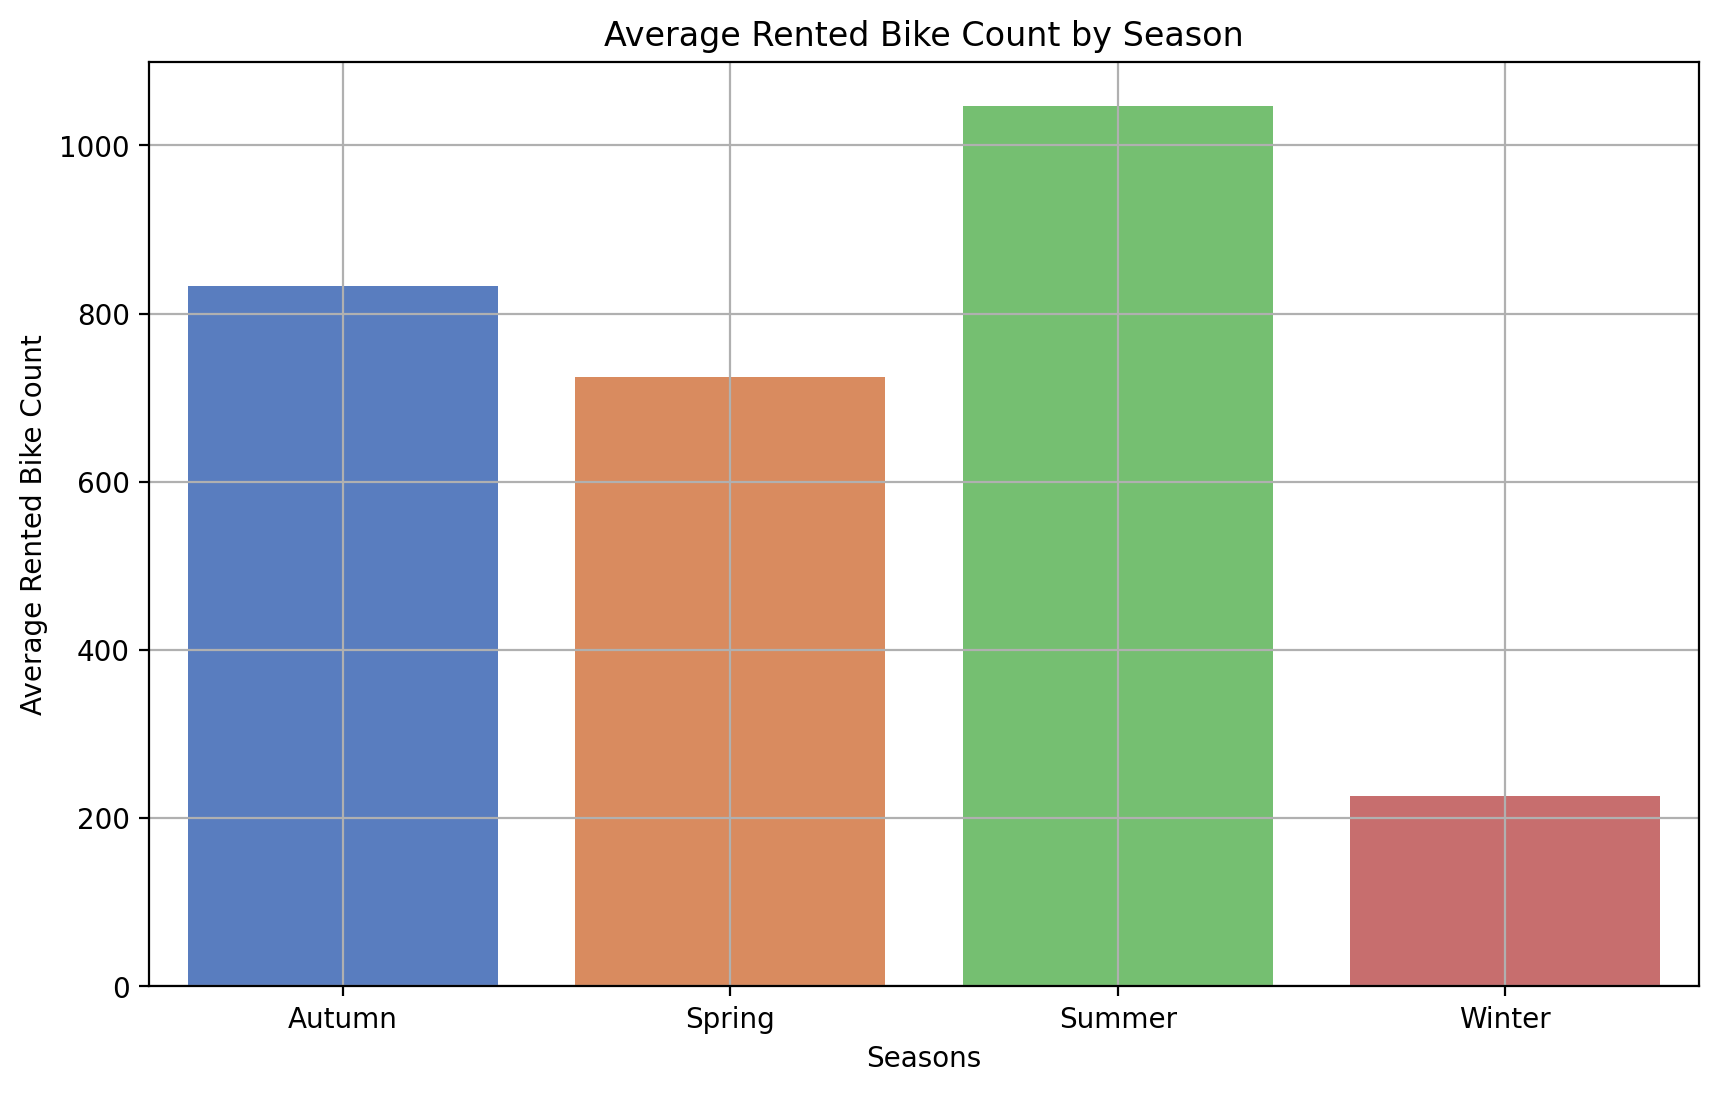

In [99]:
seasonal_avg_rentals = train_df.groupby('Seasons')['Rented Bike Count'].mean().reset_index()

# 계절별 평균 대여량 막대 그래프
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasons', y='Rented Bike Count', hue='Seasons', data=seasonal_avg_rentals, palette='muted')
plt.title('Average Rented Bike Count by Season')
plt.xlabel('Seasons')
plt.ylabel('Average Rented Bike Count')
plt.grid(True)
plt.show()

<분석 결과>
- 여름에 평균대여량이 가장 많다.
- 봄과 가을의 대여량은 비슷하다.
- 겨울에서 대여량이 가장 적다.

<결론>
- 가설에서 예측한 바와 다르게, 여름에서 가장 많은 사용률을 보이며, 겨울에 가장 적고, 봄과 가을은 여름보다는 적고 겨울보다는 많은 사용률을 보인다.

> ### 휴일 여부와 시간에 따른 대여량

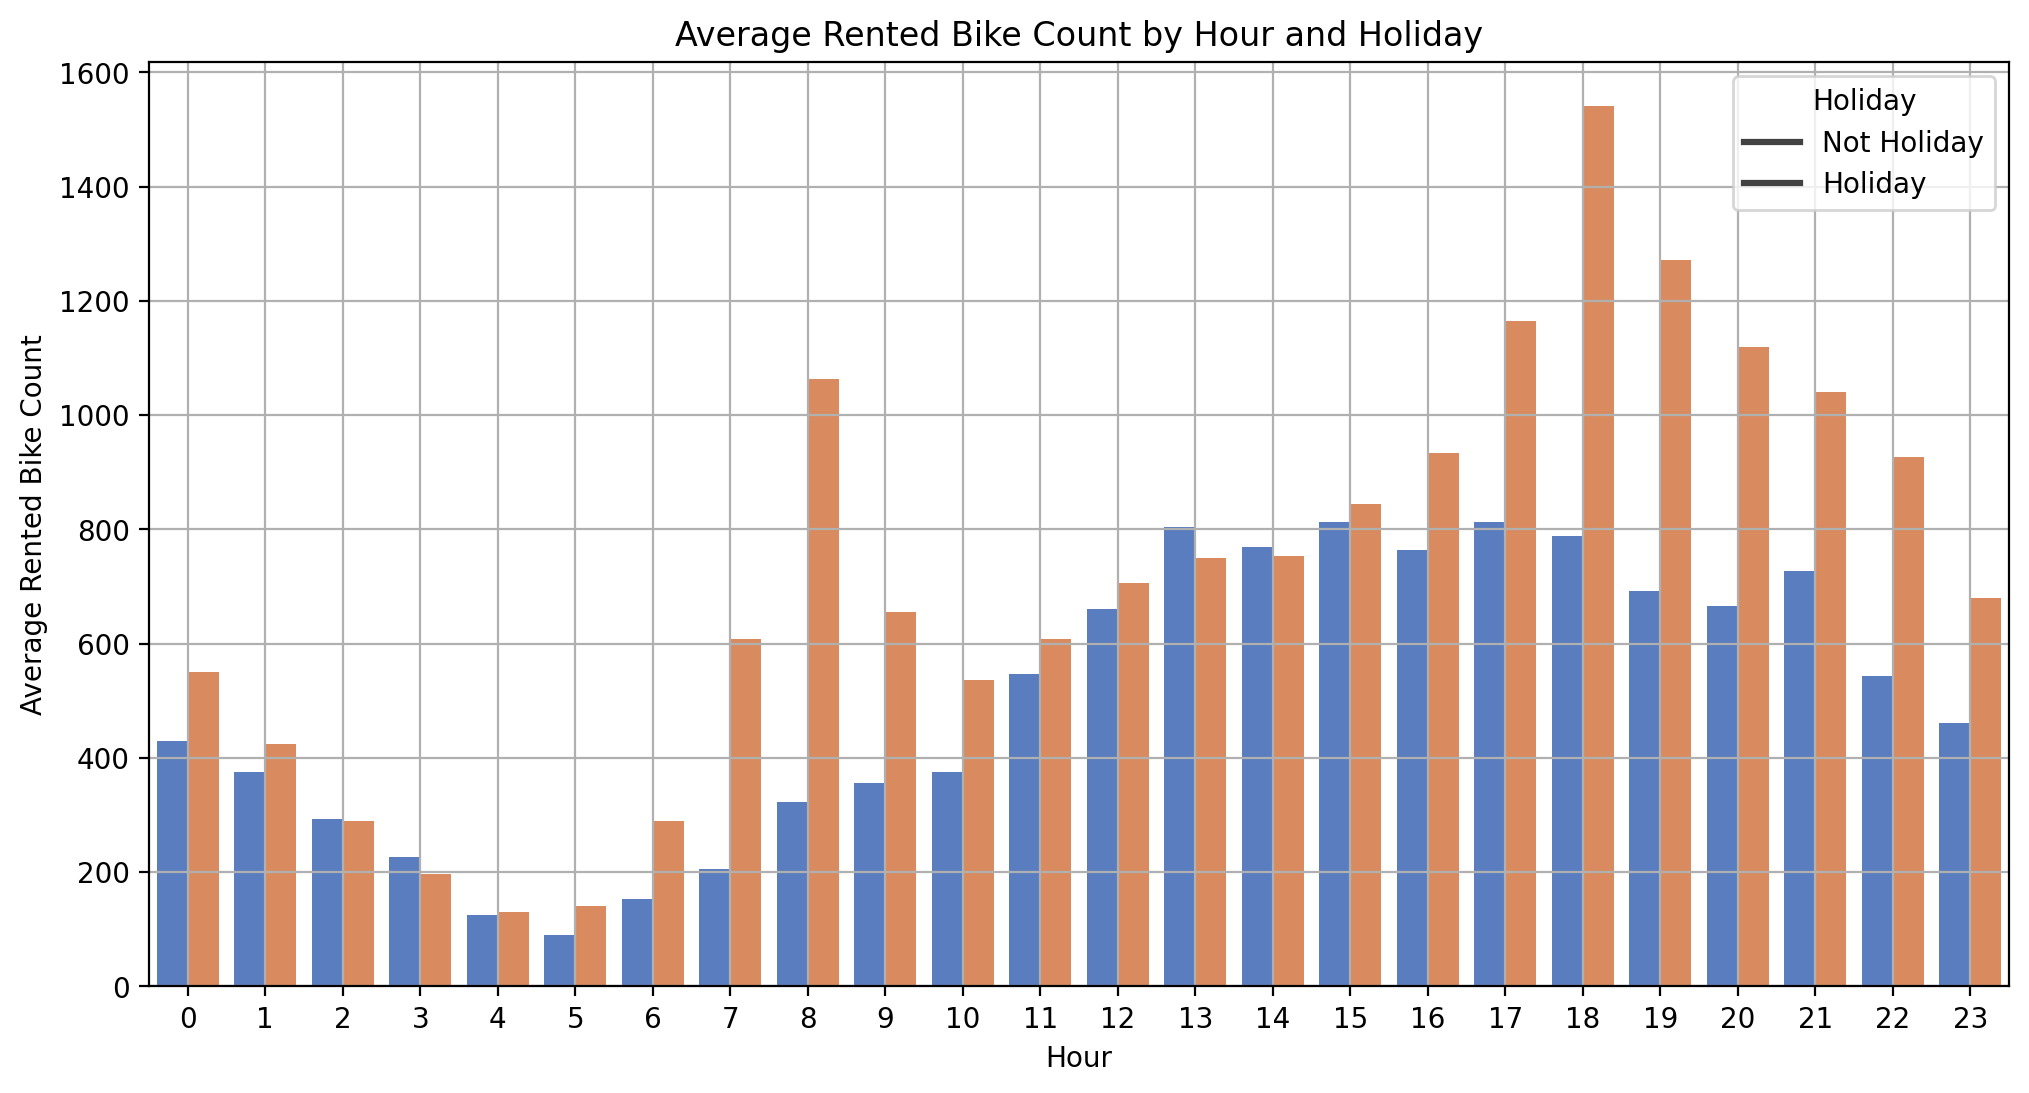

In [84]:
holiday_hour_rentals = train_df.groupby(['Holiday', 'Hour'])['Rented Bike Count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Rented Bike Count', hue='Holiday', data=holiday_hour_rentals, palette='muted')
plt.title('Average Rented Bike Count by Hour and Holiday')
plt.xlabel('Hour')
plt.ylabel('Average Rented Bike Count')
plt.legend(title='Holiday', labels=['Not Holiday', 'Holiday'])
plt.grid(True)
plt.show()


<분석 결과>
- 같은 시간대에서, 대체적으로 평일보다 휴일일때 대여량이 많다.
- 평일과 휴일의 대여량의 차이는 시간과는 무관하다.

<결론>
- 가설에서 예측한 바와 다르게, 평일 대여량이 휴일 대여량과 같거나 더 많을 떄가 존재한다.

> ### 시간에 따른 대여량

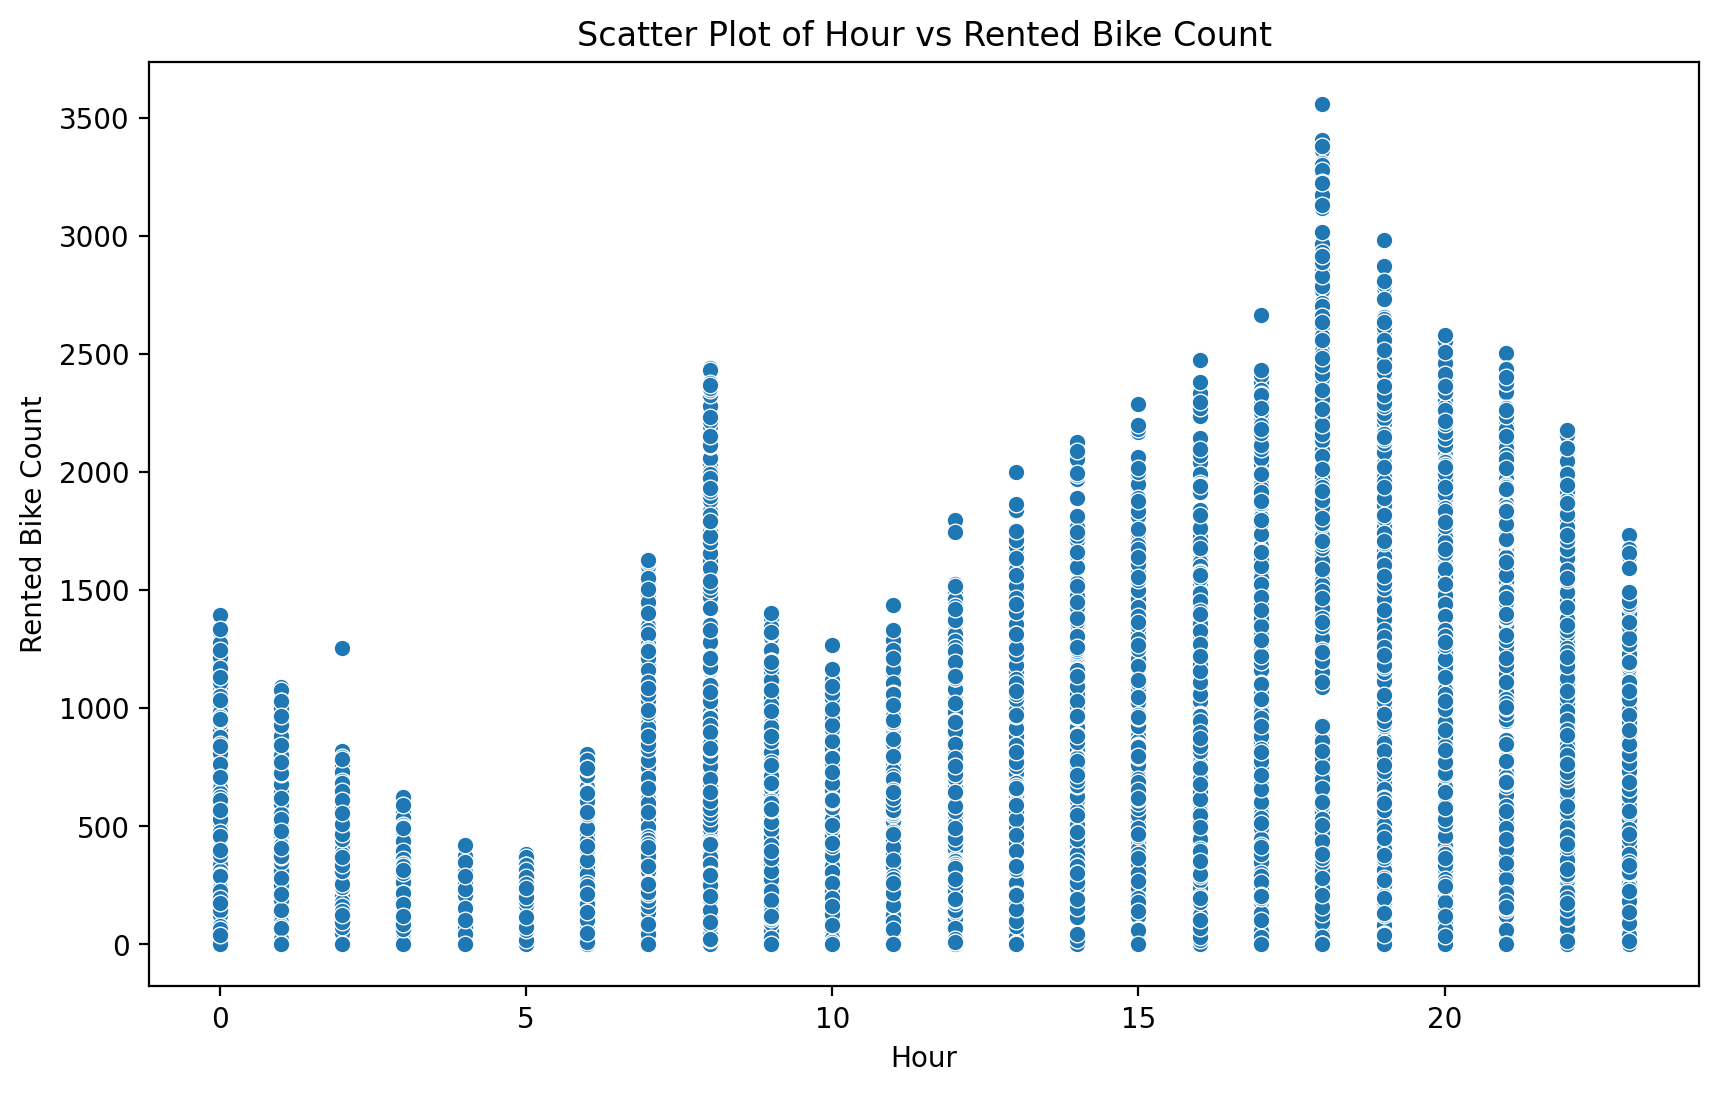

In [100]:
#시간에 따른 대여량
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hour', y='Rented Bike Count', data=train_df)
plt.title('Scatter Plot of Hour vs Rented Bike Count')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.show()

<분석 결과>
- 사용시간이 오전 3시일 때, 최대값과 멀리 떨어진 이상치가 존재한다.
- 0~5시까지는 대체적으로 사용률이 줄어들고, 5시부터 이후 시간대 까지는 오히려 증가하는 추세가 보인다.

> ### 독립변수 간 상관관계: 온도와 습도의 관계

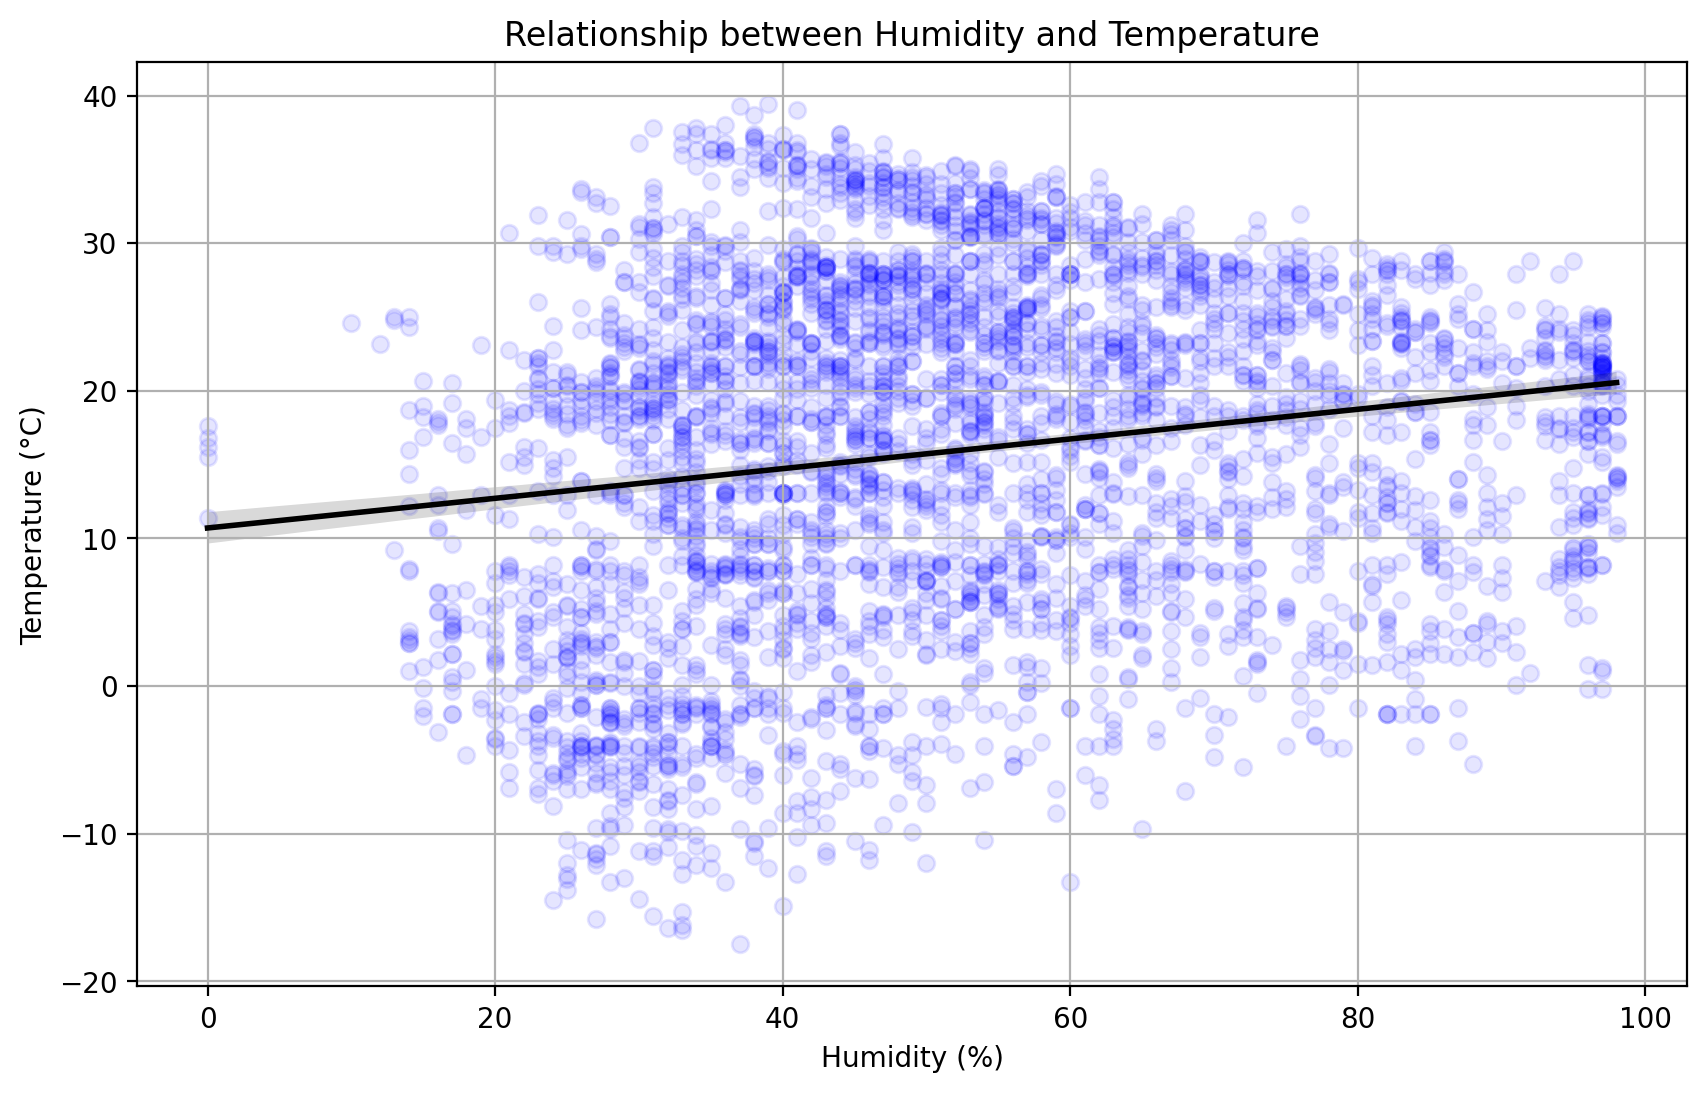

In [101]:
plt.figure(figsize=(10, 6))

filtered_data = train_df[train_df['Solar Radiation (MJ/m2)'] > 0.0]

sns.regplot(x='Humidity(%)', y='Temperature(°C)', data=filtered_data,
            scatter_kws={'alpha': 0.1}, color='blue', line_kws={'color': 'black', 'linewidth': 2})

plt.title('Relationship between Humidity and Temperature')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (°C)')

plt.grid(True)

plt.show()

<분석 결과>
- 온도와 습도는 대체적으로 비례한다.